In [10]:
# Import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
final_data = pd.read_csv('final_data.csv',index_col=0)


In [11]:
# Examine final_data df
print(final_data.describe())

         resolution  structureMolecularWeight  crystallizationTempK  \
count  33771.000000              3.377100e+04          33771.000000   
mean       2.219473              1.007227e+05            291.201611   
std        0.596595              1.539324e+05              8.961340   
min        0.680000              8.368100e+02              4.000000   
25%        1.800000              3.492054e+04            291.000000   
50%        2.100000              5.915556e+04            293.000000   
75%        2.570000              1.067060e+05            295.000000   
max        9.010000              4.921404e+06            398.000000   

       densityMatthews  densityPercentSol       phValue  residueCount  
count     33771.000000       33771.000000  33771.000000  33771.000000  
mean          2.740118          52.439039      6.796882    889.246809  
std           0.761843          10.185204      1.368236   1356.177297  
min           0.000000           0.000000      0.000000      7.000000  


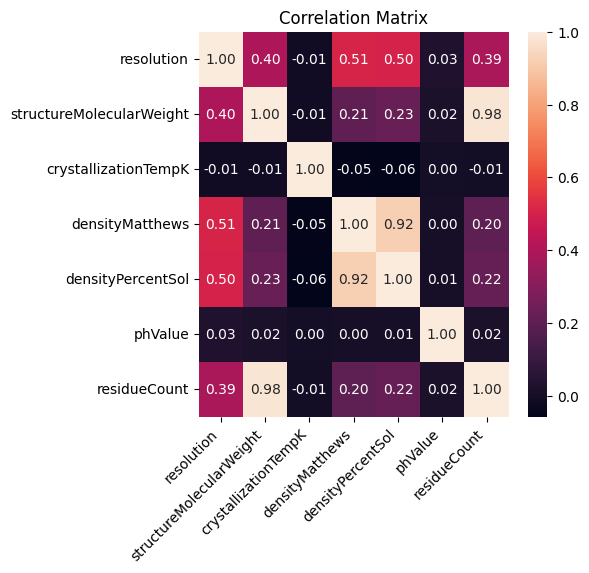

In [12]:
# Check for correlation between columns
plt.figure(figsize=(5, 5))
sns.heatmap(final_data.corr(numeric_only=True), annot=True, fmt='.2f')
plt.title(f'Correlation Matrix')
plt.xticks(rotation = 45, ha = 'right')

plt.show()


Seems like structureMolecularWeight and residueCount has high correlation and can use either

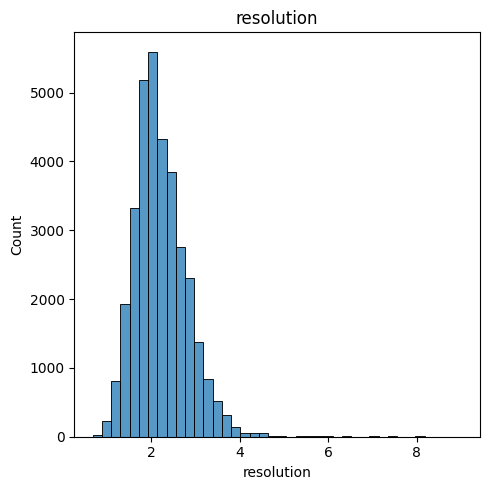

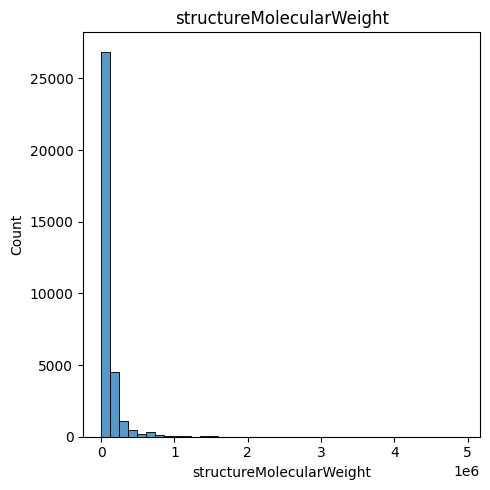

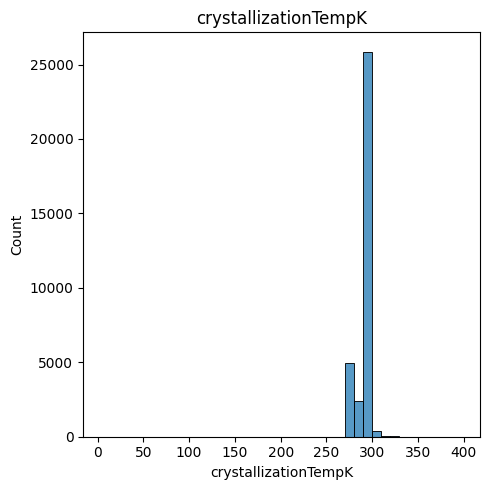

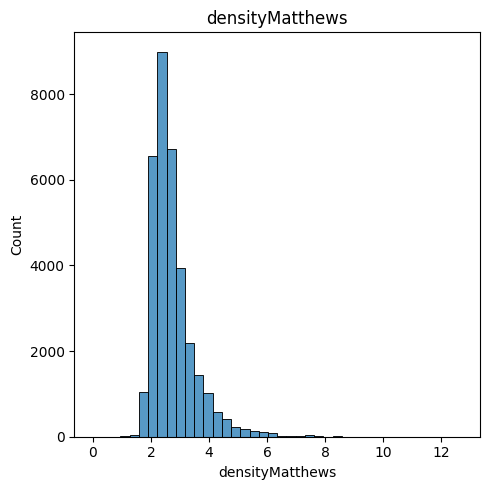

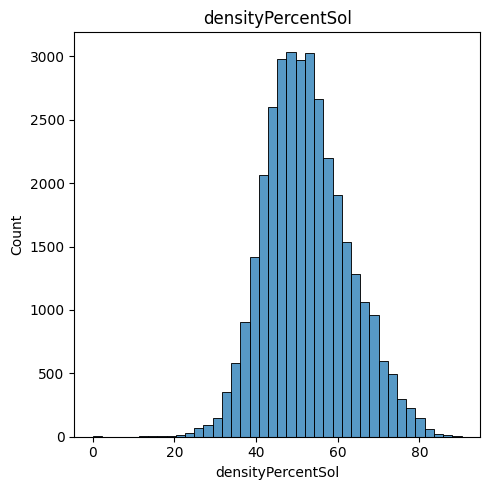

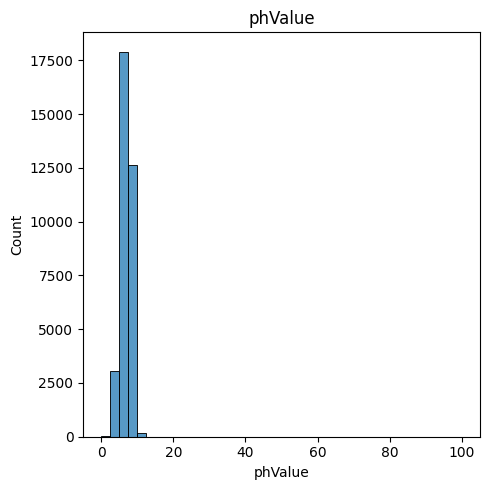

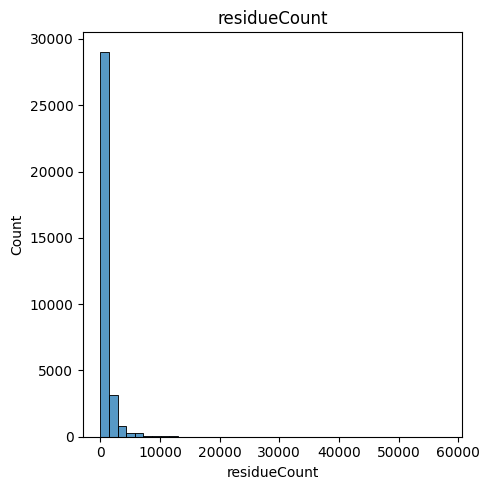

In [13]:
# Check for outliers in the features
for column in final_data.select_dtypes(include='number').columns:
    plt.figure(figsize=(5, 5))
    sns.histplot(x=column, data = final_data, bins = 40)
    plt.title(f'{column}')
    plt.tight_layout()
    plt.show()

In [14]:
# Checking the high and low values of each column
for column in final_data.select_dtypes(include='number').columns:
    print({column})
    print(final_data[column].sort_values(ascending=False))
    print()

{'resolution'}
28911    9.01
10855    9.00
20108    8.49
20109    8.49
24817    8.00
         ... 
20163    0.78
26364    0.74
28097    0.70
6744     0.69
8011     0.68
Name: resolution, Length: 33771, dtype: float64

{'structureMolecularWeight'}
33742    4921404.50
15439    4918807.00
10855    4652705.00
27786    3762007.50
27783    3762007.50
            ...    
29432       3292.05
3892        2441.58
27243       2138.67
30397       2120.47
6739         836.81
Name: structureMolecularWeight, Length: 33771, dtype: float64

{'crystallizationTempK'}
3659    398.0
4096    335.0
2271    334.0
9305    333.0
9306    333.0
        ...  
6056     20.0
930       4.0
484       4.0
659       4.0
4506      4.0
Name: crystallizationTempK, Length: 33771, dtype: float64

{'densityMatthews'}
31467    12.70
21518    11.12
28911    10.30
6809     10.00
6810     10.00
         ...  
5430      1.00
222       1.00
69        1.00
1823      1.00
28235     0.00
Name: densityMatthews, Length: 33771, dtype: fl

In [15]:
# Drop data that pH is over 14 or 0
final_data = final_data[(final_data['phValue'] <= 14) & final_data['phValue'] != 0]

# drop index 29256
final_data = final_data.drop(final_data.index[29256])

# Examine dataframe again
final_data.describe()

,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,residueCount
count,33763.000000,3.376300e+04,33763.000000,33763.000000,33763.000000,33763.000000,33763.000000
mean,2.219488,1.007273e+05,291.201037,2.740131,52.438934,6.795279,889.287593
std,0.596651,1.539484e+05,8.962288,0.761902,10.185734,1.267643,1356.316126
min,0.680000,8.368100e+02,4.000000,0.000000,0.000000,2.000000,7.000000
25%,1.800000,3.491871e+04,291.000000,2.250000,45.300000,6.000000,307.000000
50%,2.100000,5.915089e+04,293.000000,2.540000,51.630000,7.000000,522.000000
75%,2.570000,1.067060e+05,295.000000,3.000000,58.940000,7.500000,945.000000
max,9.010000,4.921404e+06,398.000000,12.700000,90.330000,11.000000,57792.000000


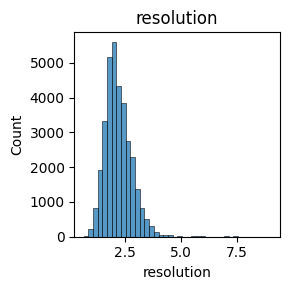

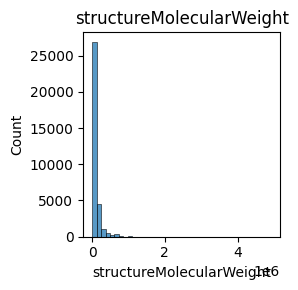

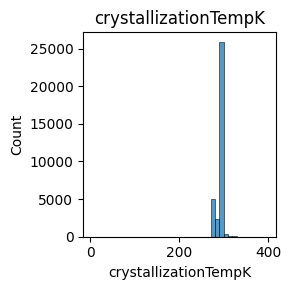

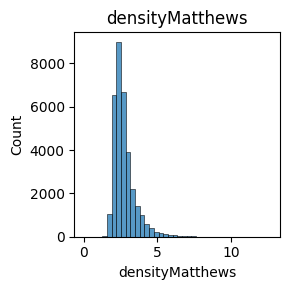

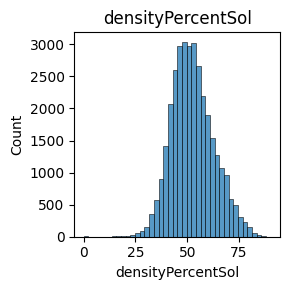

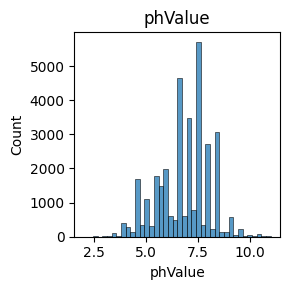

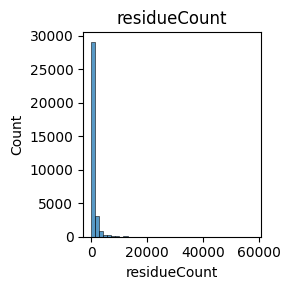

In [16]:
# Check figures again
for column in final_data.select_dtypes(include='number').columns:
    plt.figure(figsize=(3, 3))
    sns.histplot(x=column, data = final_data, bins = 40)
    plt.title(f'{column}')
    plt.tight_layout()
    plt.show()

In [17]:
# Save dataframe for ML/DL
final_data.to_csv('ml_data.csv')